In [1]:
import os

import datetime


#打印时间 
def printbar():
    nowtime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print("\n"+"========="*8 + "%s"%nowtime)

In [32]:
data = pd.read_csv("./titanic.csv")

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
dftrain_raw, dftest_raw = train_test_split(data, test_size = 0.2)

In [35]:
dftrain_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S


Text(0.5, 0, 'Survived')

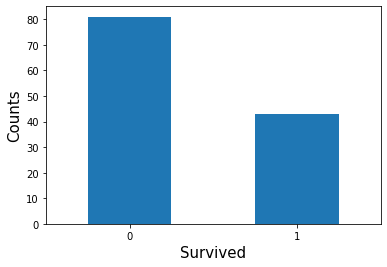

In [36]:
%matplotlib inline
%config InlineBackend.figure_format = "png"
ax = dftrain_raw["Survived"].value_counts().plot.bar(rot = 0)
ax.set_ylabel("Counts", fontsize = 15)
ax.set_xlabel("Survived",fontsize = 15)

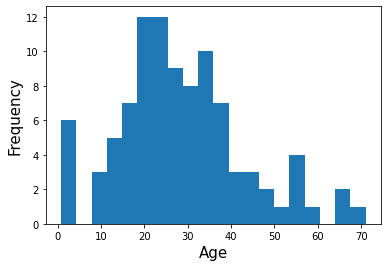

In [37]:
%matplotlib inline
%config InlineBackend.figure_format = "png"

ax = dftrain_raw["Age"].plot.hist(bins=20)

ax.set_ylabel("Frequency", fontsize=15)
ax.set_xlabel("Age", fontsize=15)
plt.show()

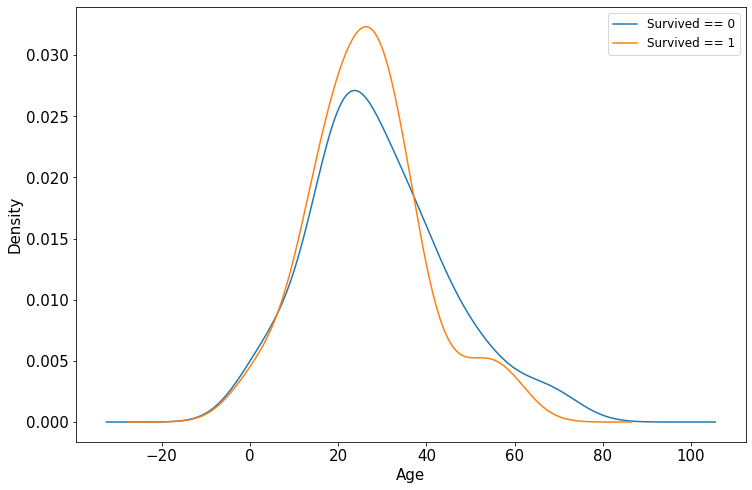

In [38]:
#年龄和label的相关性
%matplotlib inline
%config InlineBackend.figure_format = "png"

ax = dftrain_raw.query("Survived == 0")["Age"].plot(kind = "density",
                                                    figsize = (12, 8), fontsize = 15)

dftrain_raw.query("Survived == 1")["Age"].plot(kind = "density", figsize = (12,8), fontsize = 15)
ax.legend(["Survived == 0","Survived == 1"], fontsize = 12)
ax.set_ylabel("Density",fontsize = 15)
ax.set_xlabel("Age", fontsize = 15)
plt.show()


In [39]:
def preprocessing(dfdata):
    
    dfresult= pd.DataFrame()

    #Pclass
    dfPclass = pd.get_dummies(dfdata['Pclass'])
    dfPclass.columns = ['Pclass_' +str(x) for x in dfPclass.columns ]
    dfresult = pd.concat([dfresult,dfPclass],axis = 1)

    #Sex
    dfSex = pd.get_dummies(dfdata['Sex'])
    dfresult = pd.concat([dfresult,dfSex],axis = 1)

    #Age
    dfresult['Age'] = dfdata['Age'].fillna(0)
    dfresult['Age_null'] = pd.isna(dfdata['Age']).astype('int32')

    #SibSp,Parch,Fare
    dfresult['SibSp'] = dfdata['SibSp']
    dfresult['Parch'] = dfdata['Parch']
    dfresult['Fare'] = dfdata['Fare']

    #Carbin
    dfresult['Cabin_null'] =  pd.isna(dfdata['Cabin']).astype('int32')

    #Embarked
    dfEmbarked = pd.get_dummies(dfdata['Embarked'],dummy_na=True)
    dfEmbarked.columns = ['Embarked_' + str(x) for x in dfEmbarked.columns]
    dfresult = pd.concat([dfresult,dfEmbarked],axis = 1)

    return(dfresult)

x_train = preprocessing(dftrain_raw).values
y_train = dftrain_raw[['Survived']].values

x_test = preprocessing(dftest_raw).values
y_test = dftest_raw[['Survived']].values

print("x_train.shape =", x_train.shape )
print("x_test.shape =", x_test.shape )

print("y_train.shape =", y_train.shape )
print("y_test.shape =", y_test.shape )

x_train.shape = (124, 15)
x_test.shape = (32, 15)
y_train.shape = (124, 1)
y_test.shape = (32, 1)


In [50]:
preprocessing(dftrain_raw)

,Pclass_1,Pclass_2,Pclass_3,female,male,Age,Age_null,SibSp,Parch,Fare,Cabin_null,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
15,0,1,0,1,0,55.0,0,0,0,16.0000,1,0,0,1,0
80,0,0,1,0,1,22.0,0,0,0,9.0000,1,0,0,1,0
42,0,0,1,0,1,0.0,1,0,0,7.8958,1,1,0,0,0
93,0,0,1,0,1,26.0,0,1,2,20.5750,1,0,0,1,0
36,0,0,1,0,1,0.0,1,0,0,7.2292,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0,0,1,1,0,0.0,1,1,1,22.3583,0,1,0,0,0
145,0,1,0,0,1,19.0,0,1,1,36.7500,1,0,0,1,0
56,0,1,0,1,0,21.0,0,0,0,10.5000,1,0,0,1,0
100,0,0,1,1,0,28.0,0,0,0,7.8958,1,0,0,1,0


In [47]:
dftrain_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
145,146,0,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S


In [58]:
#进一步使用DataLoader和Tensorset 封装成可以迭代的管道数据
dl_train = DataLoader(TensorDataset(torch.tensor(x_train).float(),
                                    torch.tensor(y_train).float()),
                                    shuffle=True, batch_size=8)

dl_valid = DataLoader(TensorDataset(torch.tensor(x_test).float(),
                                    torch.tensor(y_test).float()),
                                    shuffle = False, batch_size=8)

In [64]:
#测试数据管道
for features, labels in dl_train:
    print(features, labels)
    break

tensor([[ 0.0000,  0.0000,  1.0000,  1.0000,  0.0000, 14.5000,  0.0000,  1.0000,
          0.0000, 14.4542,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  7.2250,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,
          0.0000,  8.0500,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  0.0000,  1.0000, 21.0000,  0.0000,  0.0000,
          1.0000, 77.2875,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.0000, 19.0000,  0.0000,  0.0000,
          2.0000, 26.2833,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000,  0.0000,  1.0000, 29.0000,  0.0000,  0.0000,
          0.0000,  8.0500,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.0000, 66.0000,  0.0000,  0.0

In [63]:
#定义模型 
# 使用pytorch通常有三种方式构建模型 
# 使用nn.Sequential按层顺序构建模型 
# 继承 nn.Module基类构建自定义模型 
# 继承nn.Module基类构建模型并辅助应用模型容器进行封装


#此处使用最简单的nn.Sequential 按层顺序模型

def create_net():
    net = nn.Sequential()
    net.add_module("linear1", nn.Linear(15, 20))
    net.add_module("relu1", nn.ReLU())
    net.add_module("linear2", nn.Linear(20, 15))
    net.add_module("relu2", nn.ReLU())
    net.add_module("linear3", nn.Linear(15,1))
    net.add_module("sigmoid",nn.Sigmoid())
    return net


net = create_net()
print(net)

Sequential(
  (linear1): Linear(in_features=15, out_features=20, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=20, out_features=15, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=15, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [71]:
len(x_train[0])

15

In [78]:
from torchkeras import summary
summary(net,input_shape=(15,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]             320
              ReLU-2                   [-1, 20]               0
            Linear-3                   [-1, 15]             315
              ReLU-4                   [-1, 15]               0
            Linear-5                    [-1, 1]              16
           Sigmoid-6                    [-1, 1]               0
Total params: 651
Trainable params: 651
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.000057
Forward/backward pass size (MB): 0.000549
Params size (MB): 0.002483
Estimated Total Size (MB): 0.003090
----------------------------------------------------------------


In [79]:
#三 训练模型
# 训练循环代码风格
#   脚本形式
#   函数形式
#   类型式


from sklearn.metrics import accuracy_score

loss_func = nn.BCELoss()
optimizer = torch.optim.Adam(params = net.parameters(), lr = 0.01) #Adam A method for stochastic optimization
metric_func = lambda y_pred, y_true: accuracy_score(y_true.data.numpy(), y_pred.data.numpy()>0.5)
metric_name = "accuracy"

Adam Adaptive Moment Estimation 本质上是带有动量项的RMSprop 利用梯度的一阶矩估计和二阶矩估计动态调增每个参数的学习率

优点在于经过偏置校正后 每一次迭代学习都有个确定范围 使得参数比较平稳

![title](./lv1_files/Snipaste_2022-03-14_13-37-23.png)

In [105]:
epochs = 10
log_step_freq = 30
dfhistory = pd.DataFrame(columns=["epoch","loss",metric_name, "val_loss","val_"+metric_name])
print("Starting Training")
nowtime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M%S")
print("=========="*8+"%s"%nowtime)

for epoch in range(1, epochs+1):
    
    #1.训练循环
    net.train()
    loss_sum = 0.0 
    metric_sum = 0.0
    step = 1
    
    for step, (features, labels) in enumerate(dl_train, 1):
        
        #梯度清零
        optimizer.zero_grad()
        
        #正向传播求损失
        predictions = net(features)
        loss = loss_func(predictions, labels)
        metric = metric_func(predictions, labels)
        
        #反向传播求梯度
        loss.backward()
        optimizer.step()
        
        #打印batch级别日志
        loss_sum += loss.item()
        metric_sum += metric.item()
        if step%log_step_freq == 0:
            print("[step = %d] loss : %.3f, "+metric_name +":%.3f") % (step, loss_sum/step, metric_sum/step)
            
            
    #2.验证循环
    net.eval()
    val_loss_sum = 0.0
    val_metric_sum = 0.0
    val_step = 1
    
    for val_step, (features, labels) in enumerate(dl_valid, 1):
        #关闭梯度计算
        with torch.no_grad():
            predictions = net(features)
            val_loss = loss_func(predictions, labels)
            val_metric = metric_func(predictions, labels)
        val_loss_sum += val_loss.item()
        val_metric_sum += val_metric.item()
        
        
    #3.记录日志
    info = (epoch, loss_sum/step, metric_sum/step,
            val_loss_sum/val_step, val_metric_sum/val_step)
    dfhistory.loc[epoch-1] = info
    
    #打印epoch级别日志
    print(("\nEPOCH = %d, loss = %.3f,"+ metric_name +\
        " = %.3f, val_loss = %.3f,"+" val_ " +metric_name +  " = %.3f")
        %info)
    nowtime = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print("\n" + "=========="*8 + "%s"%nowtime)
    
print("Finished Training")
    


Starting Training
================================================================================2022-03-14 16:4619

EPOCH = 1, loss = 0.451,accuracy = 0.820, val_loss = 0.516, val_ accuracy = 0.844

================================================================================2022-03-14 16:46:19

EPOCH = 2, loss = 0.387,accuracy = 0.836, val_loss = 0.598, val_ accuracy = 0.781

================================================================================2022-03-14 16:46:19

EPOCH = 3, loss = 0.365,accuracy = 0.852, val_loss = 0.385, val_ accuracy = 0.875

================================================================================2022-03-14 16:46:19

EPOCH = 4, loss = 0.354,accuracy = 0.844, val_loss = 0.434, val_ accuracy = 0.844

================================================================================2022-03-14 16:46:19

EPOCH = 5, loss = 0.357,accuracy = 0.852, val_loss = 0.560, val_ accuracy = 0.812

===============================================================

In [106]:
dfhistory

,epoch,loss,accuracy,val_loss,val_accuracy
0,1.0,0.451297,0.820312,0.516095,0.84375
1,2.0,0.387441,0.835938,0.597767,0.78125
2,3.0,0.365064,0.851562,0.385406,0.87500
3,4.0,0.353593,0.843750,0.433660,0.84375
4,5.0,0.356967,0.851562,0.559620,0.81250
5,6.0,0.354462,0.859375,0.497956,0.84375
6,7.0,0.329755,0.859375,0.431968,0.84375
7,8.0,0.385239,0.843750,0.905542,0.78125
8,9.0,0.431266,0.804688,0.560383,0.84375
9,10.0,0.409853,0.851562,0.547275,0.84375


In [133]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"


def plot_metric(dfhistory, metric):
    train_metrics = dfhistory[metric]
    val_metrics = dfhistory["val_"+metric]
    epochs = range(1, len(train_metrics)+1)
    plt.plot(epochs, train_metrics, "bo--")
    plt.plot(epochs, val_metrics, "ro--")
    plt.title("Training and validation" + metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, "val_"+metric])
    plt.show()


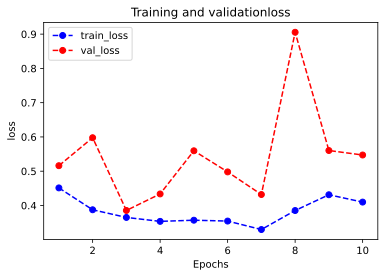

In [131]:
plot_metric(dfhistory, "loss")

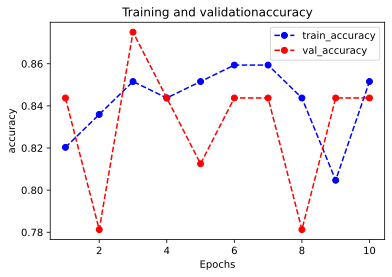

In [134]:
plot_metric(dfhistory, "accuracy")

In [136]:
#五 使用模型
#预测概率

y_pred_probs = net(torch.tensor(x_test[0:10]).float()).data
y_pred_probs

tensor([[2.8316e-01],
        [4.5738e-01],
        [9.3507e-01],
        [7.5993e-01],
        [4.6674e-02],
        [3.1023e-01],
        [1.0655e-02],
        [2.2251e-01],
        [1.2049e-05],
        [6.9089e-01]])

In [139]:
#预测类别
y_pred = torch.where(y_pred_probs > 0.5,
                     torch.ones_like(y_pred_probs), torch.zeros_like(y_pred_probs))
y_pred 

tensor([[0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.]])

In [140]:
# 六 保存模型 通过调用pickle序列化方法实现


# 1.只保存模型参数
net.state_dict().keys()

odict_keys(['linear1.weight', 'linear1.bias', 'linear2.weight', 'linear2.bias', 'linear3.weight', 'linear3.bias'])

In [142]:
#保存参数模型
torch.save(net.state_dict(),"./titanic_net_parameter.pkl")

net_clone = create_net()
net_clone.load_state_dict(torch.load("./titanic_net_parameter.pkl"))
net_clone.forward(torch.tensor(x_test[0:10]).float()).data

tensor([[2.8316e-01],
        [4.5738e-01],
        [9.3507e-01],
        [7.5993e-01],
        [4.6674e-02],
        [3.1023e-01],
        [1.0655e-02],
        [2.2251e-01],
        [1.2049e-05],
        [6.9089e-01]])

In [144]:
#保存完整模型
torch.save(net, "./titanic_net_parameter_all.pkl")

net_loaded = torch.load("./titanic_net_parameter_all.pkl")
net_loaded(torch.tensor(x_test[0:10]).float()).data

tensor([[2.8316e-01],
        [4.5738e-01],
        [9.3507e-01],
        [7.5993e-01],
        [4.6674e-02],
        [3.1023e-01],
        [1.0655e-02],
        [2.2251e-01],
        [1.2049e-05],
        [6.9089e-01]])

In [145]:
print("hello git")

hello git
